# Common Spatial Patterns (CSP) on Beta Band

### Loading data

In [6]:
from opm_thesis.classifiers.csp.csp_functions import csp_classify
import numpy as np
import matplotlib.pyplot as plt

data_dir = "./data/digits_epochs/freq_bands"
id_pairs = [[2**i, 2**j] for i in range(3, 8) for j in range(i + 1, 8)]
freqs = ["all_data", "mid_freq", "alpha", "beta", "low_gamma", "high_gamma", "ideal_beta"]
freq = freqs[3]

## Plotting CSP

### X axis

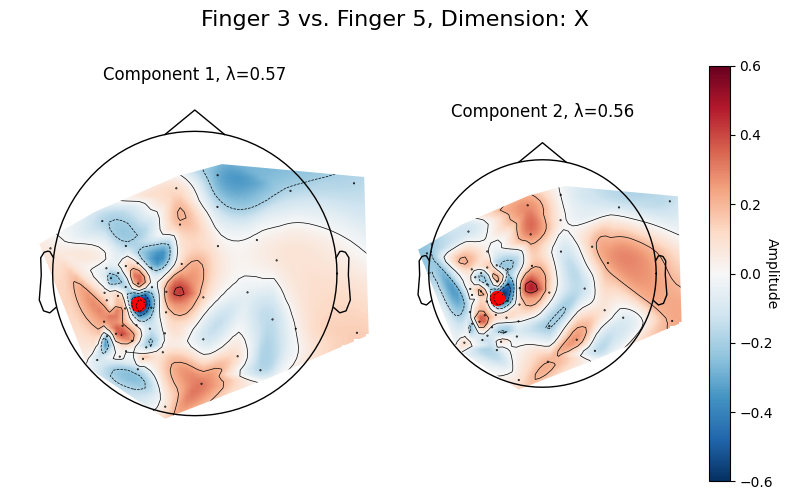

In [7]:
from opm_thesis.classifiers.csp.csp_functions import plot_csp_patterns
id_pair = [32, 128]
sphere = 0.12
plot_csp_patterns(
    id_pair, freq, data_dir, sphere=sphere, num=90, n_components=2, dim="[X]"
)
plt.show()

### Y axis

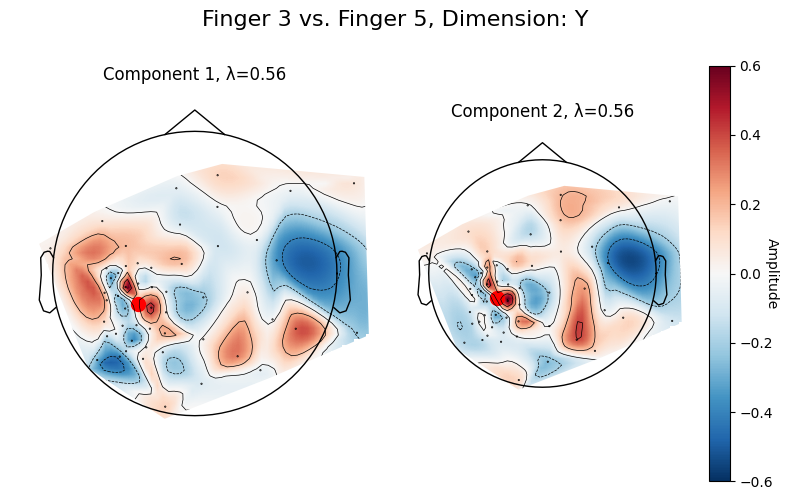

In [8]:
plot_csp_patterns(id_pair, freq, data_dir, num=90, n_components=2, sphere=sphere, dim="[Y]")
plt.show()

### Z axis

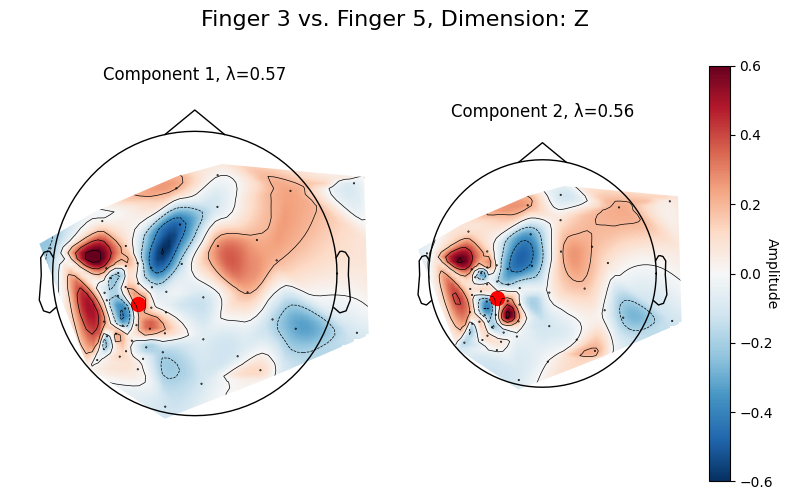

In [9]:
plot_csp_patterns(id_pair,freq, data_dir, num=90, sphere=sphere, n_components=2, dim="[Z]")
plt.show()

## Save all figures


In [ ]:
dims = ["[X]", "[Y]", "[Z]"]
for id_pair in id_pairs:
    for dim in dims:
        fig = plot_csp_patterns(
        id_pair, freq, data_dir, sphere=sphere, num=90, n_components=2, dim= dim
    )
        mapping = {8: 1, 16: 2, 32: 3, 64: 4, 128: 5}
        id_pair_str = [mapping[id_pair[0]], mapping[id_pair[1]]]
        name = f"{id_pair_str[0]}_vs_{id_pair_str[1]}_{dim[1]}"
        plt.savefig(
            "./pictures/" + name + ".svg", format="svg", bbox_inches="tight"
        )

## Beta-LDA classifier

In [ ]:
print("Frequency band: ", freq)
scores = []
eigenvalues = []
for id_pair in id_pairs:
    score, eigenvalue = csp_classify(
        id_pair=id_pair, freq=freq, num=90, dim="[X]", data_dir=data_dir
    )
    scores.append(score)
    eigenvalues.append(eigenvalue)

scores = np.array(scores)
eigenvalues = np.array(eigenvalues)

### Accuracies

In [ ]:
for idx, id_pair in enumerate(id_pairs):
    print(
        f"{id_pair[0]} vs {id_pair[1]}, {np.mean(scores[idx,:]*100):.1f} +/- {np.std(scores[idx:,]*100):.1f}"
    )